In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("boston.csv")
data.isnull().sum()
data.shape
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
corr = data.corr()['medv']
corr

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

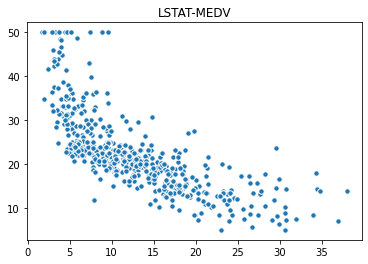

In [3]:
plt.scatter(data['lstat'], data['medv'], s=30, edgecolor='white')
plt.title('LSTAT-MEDV')
plt.show()

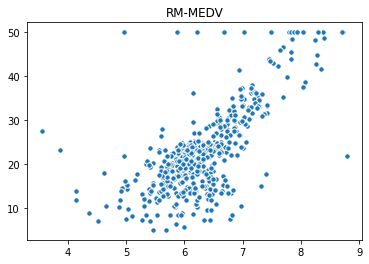

In [4]:
plt.scatter(data['rm'], data['medv'], s=30, edgecolor='white')
plt.title('RM-MEDV')
plt.show()

In [5]:
x_train = data.iloc[:400,:-1]
y_train = data.iloc[:400, -1]
x_test = data.iloc[400:,:-1]
y_test = data.iloc[400:, -1]

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LReg = LinearRegression()
LReg.fit(x_train,y_train)
pred = LReg.predict(x_test)
pred

array([12.61850663, 19.78572841, 20.91937035, 13.01450693,  6.94639182,
        5.12303941,  7.26186345, 21.83998413, 16.08974671, 24.37596059,
       17.31065044, 22.85734116,  5.19256091, 13.00577445, -3.49480533,
       15.32299614, 20.10208497,  9.63027316,  6.80890367, 21.07620623,
       22.82278496, 21.2342445 , 20.82905553, 19.52436299, 20.09331136,
       15.44875815, 21.5531436 , 17.88962803, 19.81734917, 19.07828356,
       23.68045913, 24.66708323, 27.11475737, 23.11075473, 21.08582662,
       19.18303717, 20.70321586, 14.85286051, 10.17057277, 14.8513666 ,
       13.70216217, 20.03720828, 21.48965737, 20.84258811, 14.94469636,
       18.34178339, 21.34949998, 20.65957655, 19.89276593, 20.97828867,
       23.92255669, 23.07201115, 21.55554208, 26.50514205, 22.39974578,
       22.61959883, 19.36483779, 19.29809997, 21.19218049, 21.01686435,
       23.88984255, 23.29129253, 22.54055051, 25.50940291, 22.7123066 ,
       20.83810043, 20.85171438, 19.9367506 , 18.55326766, 19.77

In [8]:
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
error=np.sqrt(mean_squared_error(y_test, pred))
print(" Linear Regression Error:",error)
r2_score(pred, y_test)

 Linear Regression Error: 6.1557922804137615


-0.08975908459828164

Text(0.5, 1.0, 'LinearRegression Predict')

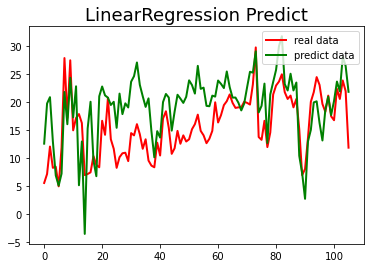

In [10]:
t = range(len(y_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='real data')
plt.plot(t, pred, 'g-', linewidth=2, label='predict data')
plt.legend(loc='upper right')
plt.title('LinearRegression Predict', fontsize=18)

In [11]:
boston = data[['lstat','rm','ptratio']]
x1_train = boston.iloc[:400,:]
y1_train = data.iloc[:400, -1]
x1_test = boston.iloc[400:,:]
y1_test = data.iloc[400:, -1]
x1_test

,lstat,rm,ptratio
400,26.77,5.987,20.2
401,20.32,6.343,20.2
402,20.31,6.404,20.2
403,19.77,5.349,20.2
404,27.38,5.531,20.2
...,...,...,...
501,9.67,6.593,21.0
502,9.08,6.120,21.0
503,5.64,6.976,21.0
504,6.48,6.794,21.0


In [12]:
# 数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train = min_max_scaler.fit_transform(x1_train)
y1_train = min_max_scaler.fit_transform(y1_train.to_numpy().reshape(-1,1)) 
x1_test = min_max_scaler.fit_transform(x1_test)
y1_test = min_max_scaler.fit_transform(y1_test.to_numpy().reshape(-1,1))


In [13]:
LReg1 = LinearRegression()
LReg1.fit(x1_train,y1_train)
pred1 = LReg1.predict(x1_test)
pred1

array([[ 0.29927185],
       [ 0.45185989],
       [ 0.46461796],
       [ 0.2526812 ],
       [ 0.19735723],
       [ 0.28262864],
       [-0.0418106 ],
       [ 0.39972272],
       [ 0.22715116],
       [ 0.5638975 ],
       [ 0.45527968],
       [ 0.50590178],
       [-0.07513992],
       [ 0.20870569],
       [-0.12962323],
       [ 0.36399492],
       [ 0.47593139],
       [ 0.1593811 ],
       [ 0.36823484],
       [ 0.52191454],
       [ 0.53073271],
       [ 0.4385268 ],
       [ 0.38392731],
       [ 0.36584   ],
       [ 0.32932899],
       [ 0.30951469],
       [ 0.40364158],
       [ 0.49355143],
       [ 0.40611943],
       [ 0.41356217],
       [ 0.48565582],
       [ 0.56106191],
       [ 0.57018236],
       [ 0.52124258],
       [ 0.48684873],
       [ 0.47504262],
       [ 0.50405135],
       [ 0.33736239],
       [ 0.19987663],
       [ 0.27225093],
       [ 0.32122802],
       [ 0.47468918],
       [ 0.4717693 ],
       [ 0.49924366],
       [ 0.30814899],
       [ 0

Text(0.5, 1.0, 'LinearRegression Predict')

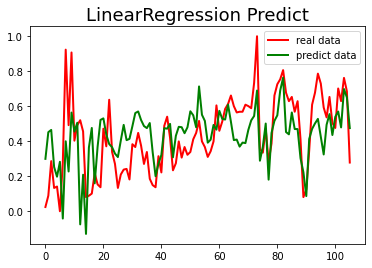

In [14]:
s = range(len(y1_test))
plt.plot(s, y1_test, 'r-', linewidth=2, label='real data')
plt.plot(s, pred1, 'g-', linewidth=2, label='predict data')
plt.legend(loc='upper right')
plt.title('LinearRegression Predict', fontsize=18)

In [15]:
error1=np.sqrt(mean_squared_error(y1_test, pred1))
print(" Linear Regression1 Error:",error1)

 Linear Regression1 Error: 0.18647687469839822


In [16]:
r2_score(pred1, y1_test)

-0.5520922147746643